In [718]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [719]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [916]:
from misc import mps_overlap, mps_entanglement_spectrum, mpo_on_mpo
from state_approximation import mps2mpo, mpo2mps, diagonal_expansion, multiple_diagonal_expansions,\
    entanglement_entropy
from disentanglers import disentangle_S2, renyi_entropy
from rfunc import pad_mps, pad
import pickle
from tebd import tebd
from contraction_shifted import contract_diagonal_expansion_top, contract_diagonal_expansion_bottom,\
                                contract_mpo, contract_diagonal_expansion_full, contract_series_diagonal_expansion
from moses_variational_shifted import optimize_single_site, _optimize_single_site_sweep_fast, apply_Us_to_A,\
                                      optimize_single_site_sweep_fast
from random_mps import *
from quantum_circuits import cnot, hadamard, bell_pair_mps

In [379]:
def rotation(phi):
    return np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])

* S should drop by log2 at each step
* to see how entanglement is removed
* look at truncation error at each step
* check if using the renyi 1/2 disentangler does a better job
* circuit of depth 1, is var moses equivalent 

In [988]:
state, _, _ = tebd(L=10, g=1.5, dt=0.1)
with open("/space/ge38huj/state_approximation/sh_data/T0.1.pkl", "rb") as f:
    sh_state = pickle.load(f)
    
Psi = mps2mpo(sh_state.copy())
#Psi = bell_pair_mps(10, 9)
#Psi = mps2mpo(Psi)
#As, Lambda, info = multiple_diagonal_expansions(Psi,1, mode='exact', num_sweeps=10)

print("Finished")

Finished


In [992]:
A, Lambda = diagonal_expansion(Psi, eta=1, num_sweeps=100)
#out = contract_series_diagonal_expansion(As, Lambda, mode='top')
out = contract_diagonal_expansion_top(A, Lambda)
np.linalg.norm(mps_overlap(Psi, out))

0.9999999998184644

In [793]:
entanglement_entropy(Lambda)

0.5224537526860992

In [736]:
out = contract_series_diagonal_expansion(As, Lambda, mode='top')
np.linalg.norm(mps_overlap(out, Psi))

0.9652182212015843

In [716]:
F = []
for i in range(5):
    As, Us, Lambda, Lp_list = _optimize_single_site_sweep_fast(Psi, As, Lp_list = None)
    out = contract_series_diagonal_expansion(As, Lambda, mode='top')
    F.append(mps_overlap(out, Psi))

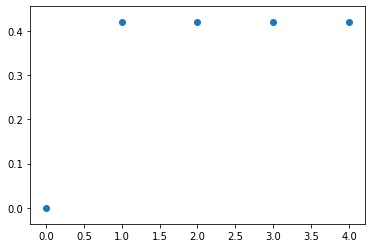

In [717]:
plt.scatter(range(len(F)), F)